In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np


In [4]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-05-01 22:00:43--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.110.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 2302 (2,2K) [text/plain]
Guardando como: “moore.csv”

moore.csv           100%[===================>]   2,25K  --.-KB/s    en 0s      

2025-05-01 22:00:44 (42,2 MB/s) - “moore.csv” guardado [2302/2302]



In [ ]:

data = pd.read_csv("moore.csv", header=None).values # Get the numpy array
X = data[:,0].reshape(-1, 1) # Converting to Nx1 matrix
Y = data[:,1].reshape(-1, 1)



# Plot the data

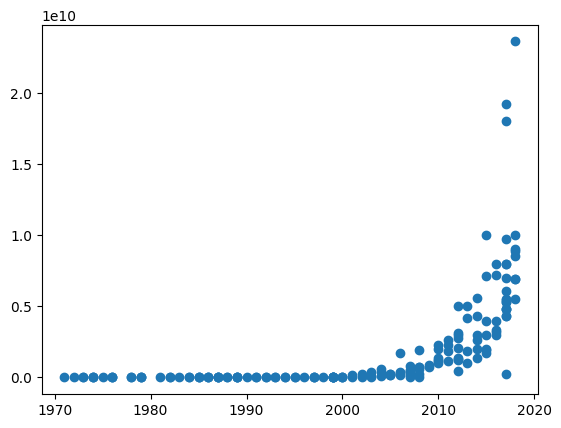

In [6]:
plot.scatter(X, Y)

# Linearizing the Data using Log Transformation

The relationship between the number of transistors (Y) and the year (X) appears to be exponential, following Moore's Law. We can model this as `Y = k * e^(r*x)`, where `k` and `r` are constants.

To make this relationship linear and suitable for linear regression, we can take the natural logarithm of both sides:
* `log(Y) = log(k * e^(r*x))`
* `log(Y) = log(k) + log(e^(r*x))`
* `log(Y) = log(k) + r*x`

This transforms the exponential relationship into a linear one: `log(Y)` is now linearly dependent on `x`, with slope `r` and intercept `log(k)`. The next cell applies this transformation to the `Y` data.

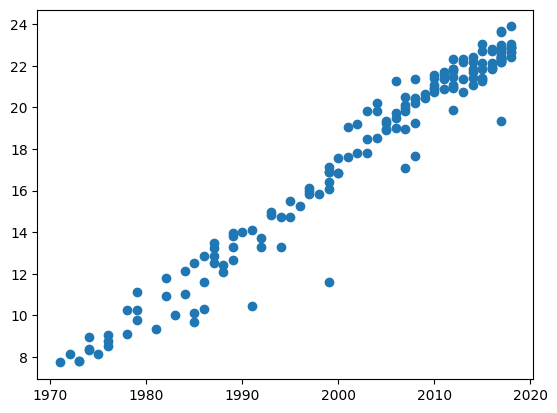

In [10]:
# Changing Space by 
Y = np.log(Y)
plot.scatter(X, Y)

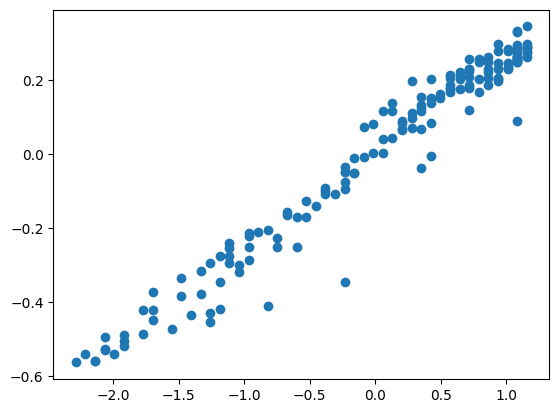

In [ ]:
mean_x = X.mean()
std_x = X.std()
mean_y = Y.mean()
std_y = Y.mean()

X = (X - mean_x)/std_x
Y = (Y - mean_y)/std_y


plot.scatter(X, Y)

In [14]:
# Cast to float32 which uses Pytorch
X = X.astype(np.float32)
Y = Y.astype(np.float32)

model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

n_epochs = 100
losses = []

for it in range(n_epochs):
    # reset gradients
    optimizer.zero_grad()

    # FeedForward
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    losses.append(loss.item())
    
    # Backpropagation

    loss.backward()

    # Update weights
    optimizer.step()

    print(f'Epoch {it}/{n_epochs}, Loss: {loss.item(): .4f}')


Epoch 0/100, Loss:  0.0240
Epoch 1/100, Loss:  0.0231
Epoch 2/100, Loss:  0.0217
Epoch 3/100, Loss:  0.0201
Epoch 4/100, Loss:  0.0183
Epoch 5/100, Loss:  0.0165
Epoch 6/100, Loss:  0.0148
Epoch 7/100, Loss:  0.0132
Epoch 8/100, Loss:  0.0118
Epoch 9/100, Loss:  0.0105
Epoch 10/100, Loss:  0.0094
Epoch 11/100, Loss:  0.0084
Epoch 12/100, Loss:  0.0076
Epoch 13/100, Loss:  0.0068
Epoch 14/100, Loss:  0.0062
Epoch 15/100, Loss:  0.0057
Epoch 16/100, Loss:  0.0052
Epoch 17/100, Loss:  0.0048
Epoch 18/100, Loss:  0.0045
Epoch 19/100, Loss:  0.0042
Epoch 20/100, Loss:  0.0040
Epoch 21/100, Loss:  0.0038
Epoch 22/100, Loss:  0.0036
Epoch 23/100, Loss:  0.0035
Epoch 24/100, Loss:  0.0034
Epoch 25/100, Loss:  0.0033
Epoch 26/100, Loss:  0.0032
Epoch 27/100, Loss:  0.0031
Epoch 28/100, Loss:  0.0031
Epoch 29/100, Loss:  0.0030
Epoch 30/100, Loss:  0.0030
Epoch 31/100, Loss:  0.0029
Epoch 32/100, Loss:  0.0029
Epoch 33/100, Loss:  0.0029
Epoch 34/100, Loss:  0.0029
Epoch 35/100, Loss:  0.0028
Ep

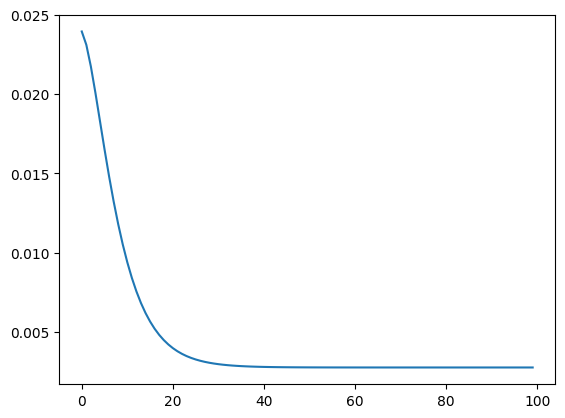

In [15]:
plot.plot(losses)

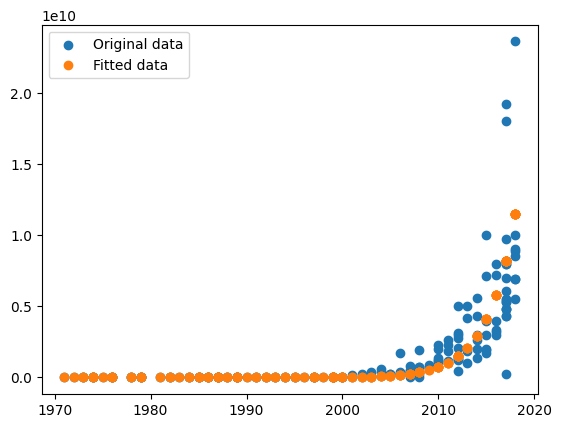

In [19]:
predicted = model(torch.from_numpy(X)).detach().numpy()
plot.scatter(std_x*X + mean_x, np.exp(std_y*Y+mean_y), label='Original data')
plot.scatter(std_x*X + mean_x, np.exp(std_y*predicted+mean_y), label='Fitted data')
plot.legend()
plot.show()

# Denormalizing the Model Parameters

After training the linear regression model on the *normalized* data (`X_norm`, `Y_norm`), the learned parameters (weight `w_norm` and bias `b_norm`) are also in this normalized space. To understand the relationship in terms of the original data (specifically, the log-transformed `Y` and original `X`), we need to denormalize these parameters.

## Derivation

The model learned the relationship:
`Y_norm = w_norm * X_norm + b_norm`

We know the normalization formulas:
*   `X_norm = (X - mean_x) / std_x`
*   `Y_norm = (Y - mean_y) / std_y` (where `Y` is `log(Y_orig)`)

Substitute these back into the learned relationship:
`(Y - mean_y) / std_y = w_norm * (X - mean_x) / std_x + b_norm`

Now, solve for `Y` (which represents `log(Y_orig)`):
`Y - mean_y = std_y * [ w_norm * (X - mean_x) / std_x + b_norm ]`
`Y = std_y * w_norm * (X - mean_x) / std_x + std_y * b_norm + mean_y`
`Y = (std_y * w_norm / std_x) * X - (std_y * w_norm * mean_x / std_x) + std_y * b_norm + mean_y`

Rearranging into the form `Y = w * X + b`:
`Y = (std_y * w_norm / std_x) * X + [ mean_y - (std_y * w_norm * mean_x / std_x) + std_y * b_norm ]`

From this, we can identify the denormalized slope `w` and intercept `b` in the log-transformed space:
*   `w = w_norm * std_y / std_x`
*   `b = mean_y - w * mean_x + b_norm * std_y` (or substitute the expression for `w`)

## Calculation

The following code calculates the denormalized slope `w`.

In [21]:
w = model.weight.data.numpy()
print(w)

[[0.26248845]]


In [23]:
denorm_w = w[0,0] * std_y / std_x
print(denorm_w)

0.34167823139226894


In [25]:
C = np.exp(denorm_w)
print(C)

1.4073073973115937


# Calculating the Doubling Time

We want to find the time interval (`delta_X`) over which the transistor count (`Y_orig`) doubles, according to our model.

Our model describes the relationship between the *logarithm* of the transistor count (`log(Y_orig)`, which we called `Y` in the log-transformed space) and the year (`X`):

`log(Y_orig) = w * X + b`

where `w` is the denormalized slope (`denorm_w`) and `b` is the denormalized intercept.

Let's consider a starting point `(X, Y_orig)`. We want to find `delta_X` such that at time `X + delta_X`, the transistor count becomes `2 * Y_orig`.

At this future time, the model equation is:

`log(2 * Y_orig) = w * (X + delta_X) + b`

Using the logarithm property `log(a*b) = log(a) + log(b)`, we can rewrite the left side:

`log(2) + log(Y_orig) = w * (X + delta_X) + b`

Expand the right side:

`log(2) + log(Y_orig) = w * X + w * delta_X + b`

We know from the original model equation that `log(Y_orig) = w * X + b`. Substitute this into the equation:

`log(2) + (w * X + b) = w * X + w * delta_X + b`

Now, we can simplify by subtracting `(w * X + b)` from both sides:

`log(2) = w * delta_X`

Finally, solve for `delta_X`:

`delta_X = log(2) / w`

This formula tells us that the time required for the transistor count to double is the natural logarithm of 2 divided by the denormalized slope `w` (which is `denorm_w` in our code). The next cell calculates this value.

In [26]:
delta_X = np.log(2) / denorm_w
print(f"Time to double (years): {delta_X}")

Time to double (years): 2.028654789435991
